After generating pose json files with https://github.com/tensorflow/tfjs-models/tree/master/pose-detection/demos. The files are made with the blazepose setting and produce around 850 poses which equates to an average 14 to 15 FPS in 60 seconds. We will upload those jsons to a jupyter notebook to look at patterns.

Json poses require some cleaning which will happen in this notebook before examining patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

<div>
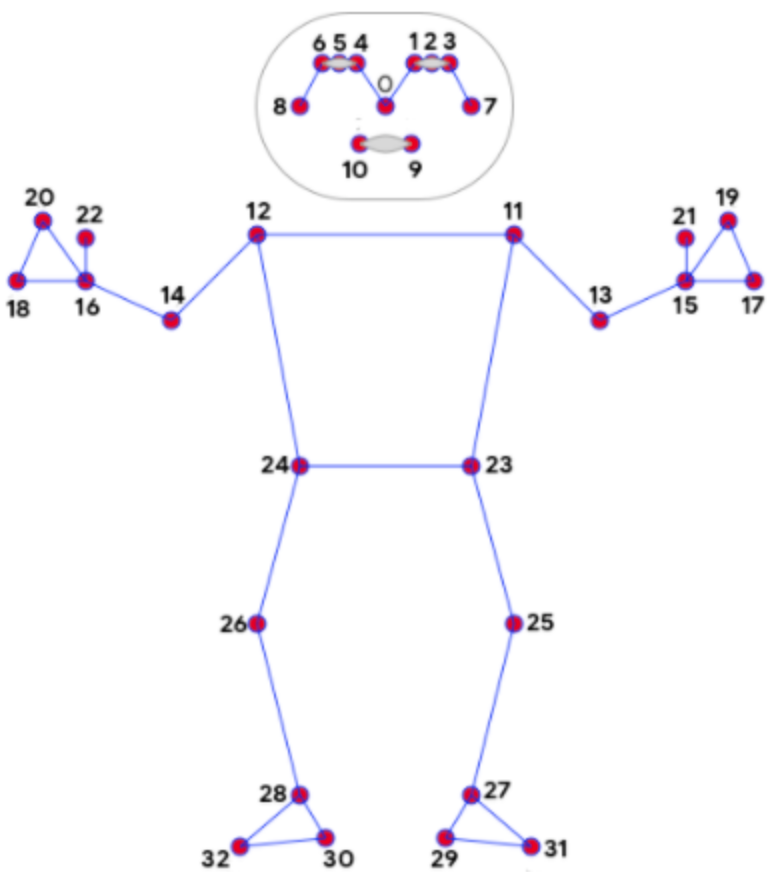
</div>

In [221]:
poses_1 = pd.read_csv("blazepose_csv/person1.csv", index_col=0)
poses_1['Person'] = 1

poses_2 = pd.read_csv("blazepose_csv/person2.csv", index_col=0)
poses_2['Person'] = 2

poses_3 = pd.read_csv("blazepose_csv/person3.csv", index_col=0)
poses_3['Person'] = 3

In [222]:
combined = pd.concat([poses_1, poses_2, poses_3], ignore_index=True)

## Column descriptions
Columns indexed 
- 0 is the frame count
- 1 to 33 are the x axis values
- 34 to 66 are the y axis values (access through `poses.iloc[:, 34:67]`)
- 67 to 99 are the score values

2553 rows, 851 per person

In [223]:
combined

,frame,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,right_ear_x,...,right_hip_score,left_knee_score,right_knee_score,left_ankle_score,right_ankle_score,left_heel_score,right_heel_score,left_foot_index_score,right_foot_index_score,Person
0,0,761.265460,767.208088,772.668730,776.141169,752.245392,746.790194,742.567051,776.953676,732.284044,...,0.999489,0.943629,0.989620,0.888427,0.958677,0.755355,0.721126,0.885620,0.915897,1
1,1,765.001892,772.472916,778.001803,782.664788,755.844063,750.570979,745.718260,787.628335,739.789794,...,0.999482,0.944937,0.988970,0.880122,0.955460,0.736900,0.706026,0.877547,0.911047,1
2,2,771.297245,777.089418,782.025350,786.048754,760.468549,754.803615,750.330085,788.332729,741.936949,...,0.999504,0.938800,0.983098,0.836420,0.941570,0.675904,0.665578,0.834606,0.888905,1
3,3,771.600942,777.215763,782.282664,786.503116,761.475724,755.917205,751.149491,788.462470,742.140836,...,0.999544,0.930180,0.976552,0.787414,0.927262,0.606601,0.626644,0.785807,0.865522,1
4,4,768.161419,775.226075,779.324757,783.637022,759.338747,754.037431,749.994390,786.051328,740.380711,...,0.999575,0.933331,0.975363,0.779720,0.925339,0.574653,0.611826,0.775569,0.861592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,846,665.664234,676.230412,680.828774,685.590266,660.824286,655.378247,650.708109,689.319761,641.500611,...,0.999982,0.975110,0.978008,0.959610,0.978674,0.838182,0.886856,0.958048,0.974217,3
2549,847,674.548215,683.989121,688.166684,692.055753,668.401883,662.874683,657.314464,692.399448,646.884246,...,0.999983,0.975420,0.979986,0.963502,0.981538,0.841275,0.892175,0.961377,0.976831,3
2550,848,673.715708,682.105709,687.033086,692.225329,666.811656,660.638251,656.025181,692.752652,645.930414,...,0.999984,0.974857,0.981568,0.966929,0.983987,0.846449,0.898943,0.964352,0.979170,3
2551,849,669.125348,678.231888,683.857953,688.410894,662.451741,657.034862,652.045822,690.961015,642.441597,...,0.999985,0.975196,0.983049,0.969951,0.986313,0.853190,0.905918,0.967473,0.981733,3


In [224]:
# NO NA VALUES
sum(np.sum(combined.isna()))

0

In [225]:
summary_df = combined.describe()
summary_df

,frame,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,right_ear_x,...,right_hip_score,left_knee_score,right_knee_score,left_ankle_score,right_ankle_score,left_heel_score,right_heel_score,left_foot_index_score,right_foot_index_score,Person
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,...,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000
mean,425.000000,707.597268,714.820519,719.553607,723.621013,700.709100,695.929973,691.431370,726.292017,683.746475,...,0.999824,0.903511,0.937110,0.864669,0.908115,0.710562,0.726435,0.865557,0.884901,2.000000
std,245.710497,101.819225,101.222111,100.821914,100.420930,101.566943,101.446568,101.310956,98.707690,99.890682,...,0.000270,0.101263,0.076400,0.173560,0.126677,0.228875,0.210509,0.176437,0.151837,0.816657
min,0.000000,221.546516,229.039402,235.168640,240.858652,213.766022,210.093260,205.958703,253.904938,206.570760,...,0.998543,0.386393,0.454927,0.166356,0.387016,0.154025,0.187251,0.186103,0.316813,1.000000
25%,212.000000,670.589049,678.044742,682.468244,686.577548,664.182552,659.419394,654.857895,689.218317,647.475261,...,0.999788,0.855513,0.923802,0.785480,0.869980,0.542010,0.580695,0.792324,0.833841,1.000000
50%,425.000000,707.826950,714.890339,719.603095,723.634102,700.683861,695.769862,691.559805,725.944463,683.903016,...,0.999961,0.944937,0.967303,0.957100,0.972970,0.813361,0.808555,0.964637,0.964772,2.000000
75%,638.000000,748.726913,756.296776,761.045221,765.332345,741.813403,737.186855,732.465875,767.579689,725.333415,...,0.999980,0.980606,0.986433,0.986411,0.990856,0.890480,0.897041,0.985984,0.987132,3.000000
max,850.000000,1122.756815,1124.752398,1128.341038,1131.238066,1112.882427,1107.571944,1101.283190,1125.767216,1083.691678,...,0.999995,0.997532,0.998699,0.998796,0.999155,0.981776,0.980807,0.998525,0.998671,3.000000


In [226]:
summary_df.loc['min'].sort_values()

frame                      0.000000
left_heel_score            0.154025
left_ankle_score           0.166356
left_foot_index_score      0.186103
right_heel_score           0.187251
                            ...    
left_ankle_y             513.822547
left_foot_index_y        555.037962
right_heel_y             566.378069
right_ankle_y            571.833216
right_foot_index_y       593.077078
Name: min, Length: 101, dtype: float64

In [227]:
# avg of score is less than 0.5 (no columns have that low of an average score)
summary_df.loc['mean'][summary_df.loc['mean'] < 0.8]
# lowest average scores are less 75% confident in their cordinates for x,y of joint

left_heel_score     0.710562
right_heel_score    0.726435
Name: mean, dtype: float64

In [228]:
combined.columns[0:30]

Index(['frame', 'nose_x', 'left_eye_inner_x', 'left_eye_x', 'left_eye_outer_x',
       'right_eye_inner_x', 'right_eye_x', 'right_eye_outer_x', 'left_ear_x',
       'right_ear_x', 'mouth_left_x', 'mouth_right_x', 'left_shoulder_x',
       'right_shoulder_x', 'left_elbow_x', 'right_elbow_x', 'left_wrist_x',
       'right_wrist_x', 'left_pinky_x', 'right_pinky_x', 'left_index_x',
       'right_index_x', 'left_thumb_x', 'right_thumb_x', 'left_hip_x',
       'right_hip_x', 'left_knee_x', 'right_knee_x', 'left_ankle_x',
       'right_ankle_x'],
      dtype='object')

For this next part, I am thinking about what features are most relevant as we try to understand how to use this data.
`'nose_x','left_shoulder_x','right_shoulder_x,'left_wrist_x','right_wrist_x','left_knee_x','right_knee_x' `

# Exploratory Data Visualizations & Analysis

In [229]:
# Standardize values
scaler = StandardScaler()
  
# transform data
convert_p1 = pd.DataFrame(scaler.fit_transform(combined.iloc[:, 1:67].T).T, columns=combined.columns[1:67])
# convert_p1

In [230]:
df_scaled = combined.iloc[:, [0, 100]].join(convert_p1)
df_scaled

,frame,Person,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,...,left_hip_y,right_hip_y,left_knee_y,right_knee_y,left_ankle_y,right_ankle_y,left_heel_y,right_heel_y,left_foot_index_y,right_foot_index_y
0,0,1,0.881875,0.913099,0.941791,0.960036,0.834481,0.805818,0.783628,0.964305,...,-0.623516,-0.662736,-0.037666,-0.036068,0.622457,0.616883,0.711329,0.705531,0.817989,0.825159
1,1,1,0.847780,0.886272,0.914758,0.938783,0.800598,0.773430,0.748428,0.964356,...,-0.629090,-0.672609,-0.006080,-0.035108,0.596960,0.580053,0.701329,0.673410,0.790451,0.773003
2,2,1,0.888127,0.918811,0.944959,0.966274,0.830761,0.800751,0.777052,0.978373,...,-0.679191,-0.708458,-0.024971,-0.041602,0.527454,0.585254,0.632713,0.685272,0.766851,0.795875
3,3,1,0.886732,0.916479,0.943324,0.965684,0.833088,0.803639,0.778379,0.976065,...,-0.690104,-0.714491,-0.028134,-0.045958,0.528290,0.587713,0.628467,0.682238,0.768917,0.799274
4,4,1,0.860898,0.898250,0.919921,0.942721,0.814251,0.786222,0.764846,0.955485,...,-0.697548,-0.718876,-0.033211,-0.049391,0.554306,0.583737,0.647753,0.675578,0.779521,0.791368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,846,3,0.867346,0.927737,0.954019,0.981233,0.839683,0.808556,0.781864,1.002549,...,-0.475158,-0.555212,0.271047,0.171403,0.894656,0.827077,0.979095,0.932223,1.174485,1.096184
2549,847,3,0.901886,0.954663,0.978017,0.999758,0.867527,0.836628,0.805545,1.001679,...,-0.467292,-0.543136,0.265697,0.155467,0.880909,0.812901,0.961001,0.929970,1.153143,1.075562
2550,848,3,0.896330,0.942817,0.970119,0.998888,0.858076,0.823870,0.798310,1.001810,...,-0.459783,-0.533436,0.267997,0.152989,0.880639,0.815971,0.958608,0.937294,1.157977,1.074181
2551,849,3,0.905170,0.957724,0.990191,1.016466,0.866657,0.835397,0.806606,1.031183,...,-0.483037,-0.557922,0.263194,0.145562,0.913252,0.848406,0.994035,0.978326,1.205135,1.117049


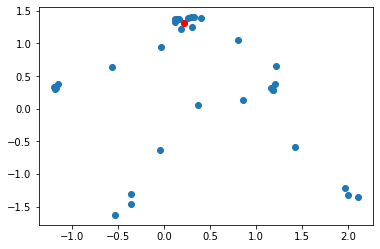

In [250]:
# Plot of body at frame 258 of 850 for person 1
plt.scatter(df_scaled.iloc[258, 2:35], -df_scaled.iloc[258, 35:68])
plt.scatter(df_scaled.iloc[258, 2], -df_scaled.iloc[258, 35], color='red');

In [14]:
# df_scaled#.to_csv('sca.csv') 
# combined.to_csv('combined.csv') 
# DO NOT NEED TO RERUN CELL 

# Feature Engineering
- Considering neck angle, etc

In [20]:
poses_1[['nose_y', 'left_hip_y','right_hip_y']]

,nose_y,left_hip_y,right_hip_y
0,308.234831,474.757905,467.293401
1,296.811271,478.351760,469.904969
2,295.040673,475.440600,469.915995
3,295.130360,473.974413,469.371490
4,294.764323,473.401835,469.368055
...,...,...,...
846,257.066706,460.425833,470.084479
847,252.757998,459.920497,467.895416
848,248.207432,459.945244,468.271258
849,250.093606,460.292758,468.464652


In [49]:
key_joint = poses_1
key_joint

,frame,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,right_ear_x,...,right_hip_score,left_knee_score,right_knee_score,left_ankle_score,right_ankle_score,left_heel_score,right_heel_score,left_foot_index_score,right_foot_index_score,Person
0,0,761.265460,767.208088,772.668730,776.141169,752.245392,746.790194,742.567051,776.953676,732.284044,...,0.999489,0.943629,0.989620,0.888427,0.958677,0.755355,0.721126,0.885620,0.915897,1
1,1,765.001892,772.472916,778.001803,782.664788,755.844063,750.570979,745.718260,787.628335,739.789794,...,0.999482,0.944937,0.988970,0.880122,0.955460,0.736900,0.706026,0.877547,0.911047,1
2,2,771.297245,777.089418,782.025350,786.048754,760.468549,754.803615,750.330085,788.332729,741.936949,...,0.999504,0.938800,0.983098,0.836420,0.941570,0.675904,0.665578,0.834606,0.888905,1
3,3,771.600942,777.215763,782.282664,786.503116,761.475724,755.917205,751.149491,788.462470,742.140836,...,0.999544,0.930180,0.976552,0.787414,0.927262,0.606601,0.626644,0.785807,0.865522,1
4,4,768.161419,775.226075,779.324757,783.637022,759.338747,754.037431,749.994390,786.051328,740.380711,...,0.999575,0.933331,0.975363,0.779720,0.925339,0.574653,0.611826,0.775569,0.861592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,846,687.135341,692.643315,697.739997,701.243006,675.913248,670.385027,664.674659,701.849574,656.199942,...,0.999609,0.791548,0.729732,0.622938,0.576346,0.380348,0.362893,0.589152,0.504051,1
847,847,685.306989,688.416994,692.917572,696.408034,674.081715,668.086203,663.035365,696.609593,653.511561,...,0.999396,0.738149,0.690210,0.565839,0.551614,0.331370,0.328236,0.526924,0.467872,1
848,848,682.185822,682.575079,687.027781,690.565558,670.311015,664.869200,659.903795,688.604910,648.815972,...,0.999302,0.680505,0.650292,0.503490,0.507863,0.285272,0.290780,0.465701,0.424343,1
849,849,670.249790,671.420154,676.022414,679.695986,658.714894,653.438801,648.097800,675.244113,636.450040,...,0.999345,0.643377,0.619168,0.464532,0.463934,0.251390,0.255078,0.429175,0.383682,1


In [50]:
key_joint.loc[:,'left_nose_to_hip'] = key_joint['left_hip_y'] - key_joint['nose_y']
key_joint.loc[:,'right_nose_to_hip'] = key_joint['right_hip_y'] - key_joint['nose_y']
key_joint.loc[:,'left_hip_to_knee'] = key_joint['left_knee_y'] - key_joint['left_hip_y'] 
key_joint.loc[:,'right_hip_to_knee'] = key_joint['right_knee_y'] - key_joint['right_hip_y']
key_joint.loc[:, 'avg_hip_to_knee'] = np.mean([key_joint['left_knee_y'],key_joint['right_knee_y']], axis=0) - np.mean([key_joint['left_hip_y'],key_joint['right_hip_y']], axis=0)
key_joint



,frame,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,right_ear_x,...,left_heel_score,right_heel_score,left_foot_index_score,right_foot_index_score,Person,left_nose_to_hip,right_nose_to_hip,left_hip_to_knee,right_hip_to_knee,avg_hip_to_knee
0,0,761.265460,767.208088,772.668730,776.141169,752.245392,746.790194,742.567051,776.953676,732.284044,...,0.755355,0.721126,0.885620,0.915897,1,166.523073,159.058570,111.499501,119.268247,115.383874
1,1,765.001892,772.472916,778.001803,782.664788,755.844063,750.570979,745.718260,787.628335,739.789794,...,0.736900,0.706026,0.877547,0.911047,1,181.540489,173.093698,120.921771,123.734543,122.328157
2,2,771.297245,777.089418,782.025350,786.048754,760.468549,754.803615,750.330085,788.332729,741.936949,...,0.675904,0.665578,0.834606,0.888905,1,180.399927,174.875323,123.494688,125.879863,124.687276
3,3,771.600942,777.215763,782.282664,786.503116,761.475724,755.917205,751.149491,788.462470,742.140836,...,0.606601,0.626644,0.785807,0.865522,1,178.844054,174.241130,124.946265,126.185075,125.565670
4,4,768.161419,775.226075,779.324757,783.637022,759.338747,754.037431,749.994390,786.051328,740.380711,...,0.574653,0.611826,0.775569,0.861592,1,178.637511,174.603732,125.650596,126.624113,126.137355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,846,687.135341,692.643315,697.739997,701.243006,675.913248,670.385027,664.674659,701.849574,656.199942,...,0.380348,0.362893,0.589152,0.504051,1,203.359128,213.017773,133.871937,126.471244,130.171591
847,847,685.306989,688.416994,692.917572,696.408034,674.081715,668.086203,663.035365,696.609593,653.511561,...,0.331370,0.328236,0.526924,0.467872,1,207.162499,215.137418,134.152909,126.386064,130.269486
848,848,682.185822,682.575079,687.027781,690.565558,670.311015,664.869200,659.903795,688.604910,648.815972,...,0.285272,0.290780,0.465701,0.424343,1,211.737812,220.063826,134.106988,138.720406,136.413697
849,849,670.249790,671.420154,676.022414,679.695986,658.714894,653.438801,648.097800,675.244113,636.450040,...,0.251390,0.255078,0.429175,0.383682,1,210.199152,218.371046,135.130765,139.589754,137.360260


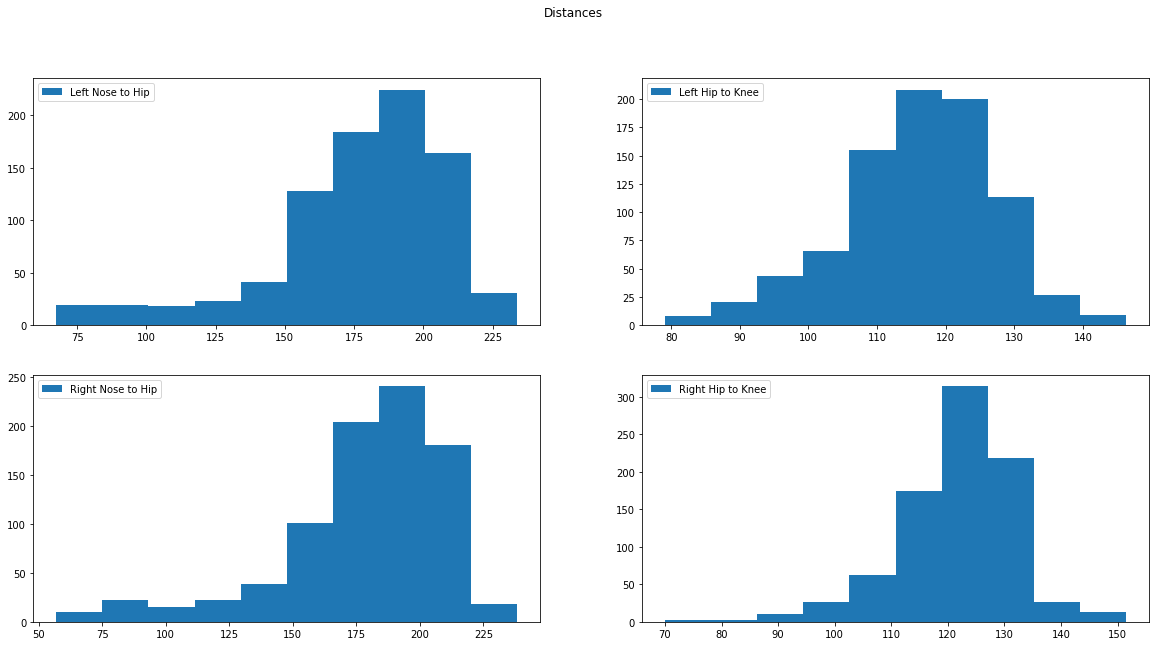

In [82]:
key_joint.sort_values('left_nose_to_hip')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=[20,10])
fig.suptitle("Distances")
ax1.hist(key_joint['left_nose_to_hip'], label='Left Nose to Hip');
ax1.legend(loc='upper left')

ax2.hist(key_joint['left_hip_to_knee'], label ='Left Hip to Knee');
ax2.legend(loc='upper left')

ax3.hist(key_joint['right_nose_to_hip'], label ='Right Nose to Hip');
ax3.legend(loc='upper left')

ax4.hist(key_joint['right_hip_to_knee'], label ='Right Hip to Knee');
ax4.legend(loc='upper left');

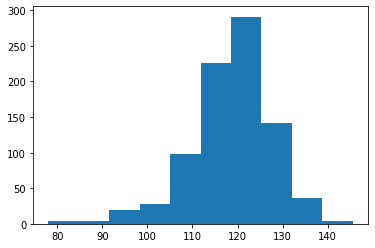

In [52]:
plt.hist(key_joint['avg_hip_to_knee']);

Text(0, 0.5, 'Average Distance between Hips and Knees')

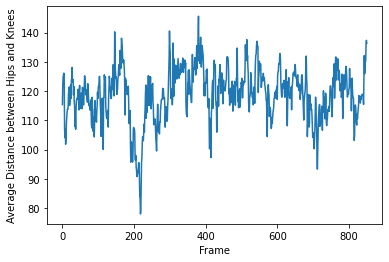

In [85]:
plt.plot(key_joint['frame'], key_joint['avg_hip_to_knee']);
plt.xlabel('Frame')
plt.ylabel('Average Distance between Hips and Knees')

## looking for important moves/poses based on video and human analysis
### hand poses and if they are equal

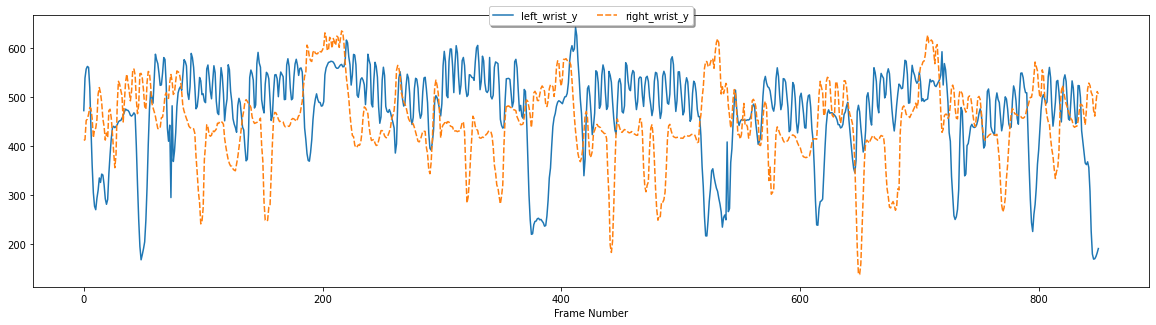

In [119]:
# heights of wrists over time
wrists = key_joint[['left_wrist_y','right_wrist_y']]
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=wrists, ax=ax); 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Frame Number');

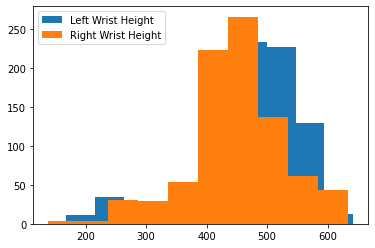

In [137]:
# Wrist Heights
# can this be used to estimate hand dominance? if one hand tends to be lower?
# does the video account for the mirroring?
plt.hist(key_joint['left_wrist_y'], label='Left Wrist Height');
plt.legend(loc='upper left');

plt.hist(key_joint['right_wrist_y'], label='Right Wrist Height');
plt.legend(loc='upper left');

In [125]:
# Not exactly equal 
sum(key_joint['left_wrist_y'] == key_joint['right_wrist_y'])

0

In [194]:
diff_wrist_height = key_joint['left_wrist_y'] - key_joint['right_wrist_y']
sorted(abs(diff_wrist_height))

[0.04519306605368456,
 0.596756173132178,
 0.7009096553618406,
 0.8773166619657786,
 0.94023319491248,
 2.6426280664391584,
 2.724684014874356,
 2.7844009910262457,
 2.918235534010421,
 3.0597325683150416,
 3.161598435527992,
 3.4030866152265276,
 3.615709433349764,
 3.8664007965825817,
 3.905346274234091,
 3.922830986625172,
 4.484266158953176,
 5.122555957881957,
 5.3575199530625355,
 5.698013407475457,
 5.724996761915577,
 5.737403674076461,
 5.801275224315134,
 5.9340773717866,
 6.443496575855704,
 6.751373172322246,
 6.83627144496802,
 6.942238197788413,
 6.9694099454929415,
 6.981598734828765,
 7.031143373783834,
 7.038745427148285,
 7.061521348168242,
 7.384650339257973,
 7.50201199332821,
 7.888815104649495,
 7.894094781887645,
 7.926728747510992,
 8.28356650716239,
 8.373450361300002,
 8.768125007662945,
 9.018374306824114,
 9.26178792423724,
 9.496648450583677,
 9.557735890885567,
 9.717081675960571,
 9.909624955201025,
 10.844136631582558,
 10.939939902606568,
 11.1440455753

In [159]:
14.2*60

852.0

In [185]:
# Number of frames per second is about 14.2
14.2*60

# Estimating second in video frame was produced by
258/14.2

18.169014084507044

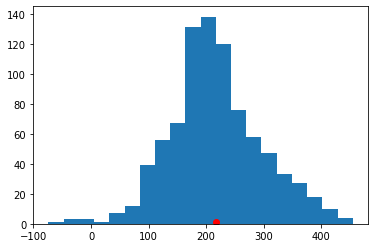

In [152]:
width_btwn_wrist = key_joint['left_wrist_x'] - key_joint['right_wrist_x']
plt.hist(width_btwn_wrist, bins=20);
plt.scatter(x=np.mean(width_btwn_wrist), y=1, color="red");

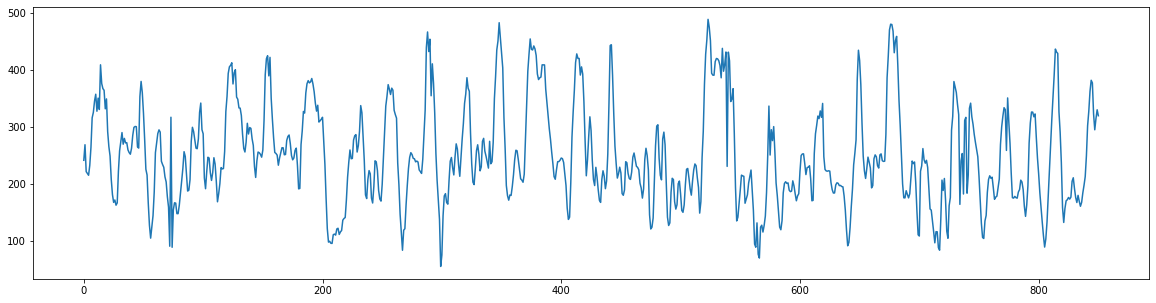

In [170]:
wrist_eudist = ((key_joint['left_wrist_x'] - key_joint['right_wrist_x'])**2 + (key_joint['left_wrist_y'] - key_joint['right_wrist_y'])**2)**0.5
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(wrist_eudist.index, wrist_eudist);


1 to 33 are the x axis values
34 to 66 are the y axis values (access through poses.iloc[:, 34:67]
                                

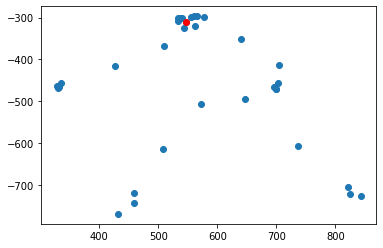

In [238]:
plt.scatter(key_joint.iloc[258, 1:34], -key_joint.iloc[258, 34:67])
plt.scatter(key_joint.iloc[258, 1], -key_joint.iloc[258, 34], color='red');

In [211]:
# INDEX OF MAX VALUE
np.argmax(np.max(key_joint))
np.max(key_joint).index[20]

'left_index_x'

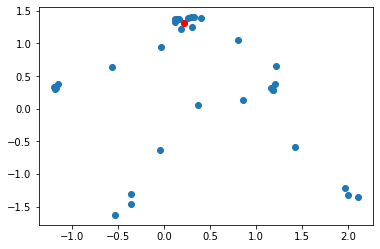

In [245]:
plt.scatter(df_scaled.iloc[258, 2:35], -df_scaled.iloc[258, 35:68])
plt.scatter(df_scaled.iloc[258, 2], -df_scaled.iloc[258, 35], color='red');